In [3]:
import pandas as pd
from read_data import read_data
from image import image_process
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from logistic import binary_logistic
from sklearn.linear_model import LogisticRegression

In [4]:
X,y = read_data()

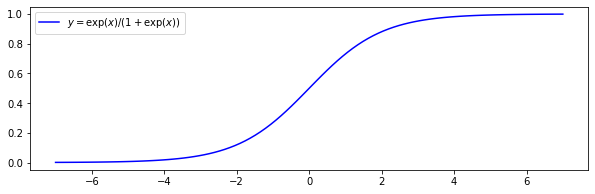

In [3]:
# This function illustrates the idea for logistic regression. To classify binary data,
# we pretend that we are still predicting a continuous label between 0 and 1, and this
# label correspond to the probability of success (= 1). This is like treating the label
# as a Bernoulli(p) random variable with unknown p.
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

fig, ax = plt.subplots(1,1, figsize = [10,3])
x = np.linspace(-7, 7, 100)
ax.plot(x, sigmoid(x), color='blue', label="$y=\exp(x)/(1+\exp(x))$")
ax.legend()

In [33]:
bl = binary_logistic(X, y)
W, score = bl.train(0, 1)
print(score)

/Users/haoyuli/Desktop/pic_final_project/digit_recognition/logistic.py:33: RuntimeWarning: overflow encountered in exp
  Q = 1 / (1 + np.exp(-X.T @ W1))


0.9963915200721696


In [46]:
result_accuracy = bl.compute_all_accuracy()
print(result_accuracy)

/Users/haoyuli/Desktop/pic_final_project/digit_recognition/logistic.py:33: RuntimeWarning: overflow encountered in exp
  Q = 1 / (1 + np.exp(-X.T @ W1))


[[1.     0.9986 0.9875 0.9926 0.9944 0.9798 0.9894 0.9944 0.9874 0.9928]
 [0.9986 1.     0.9895 0.9902 0.9943 0.9934 0.9959 0.9912 0.9773 0.9935]
 [0.9875 0.9895 1.     0.9684 0.9843 0.9777 0.9733 0.9834 0.9667 0.9864]
 [0.9926 0.9902 0.9684 1.     0.9907 0.9512 0.9912 0.9822 0.9621 0.9773]
 [0.9944 0.9943 0.9843 0.9907 1.     0.985  0.9903 0.9832 0.989  0.963 ]
 [0.9798 0.9934 0.9777 0.9512 0.985  1.     0.9742 0.9855 0.9498 0.9779]
 [0.9894 0.9959 0.9733 0.9912 0.9903 0.9742 1.     0.9948 0.9837 0.9966]
 [0.9944 0.9912 0.9834 0.9822 0.9832 0.9855 0.9948 1.     0.9842 0.9532]
 [0.9874 0.9773 0.9667 0.9621 0.989  0.9498 0.9837 0.9842 1.     0.9712]
 [0.9928 0.9935 0.9864 0.9773 0.963  0.9779 0.9966 0.9532 0.9712 1.    ]]


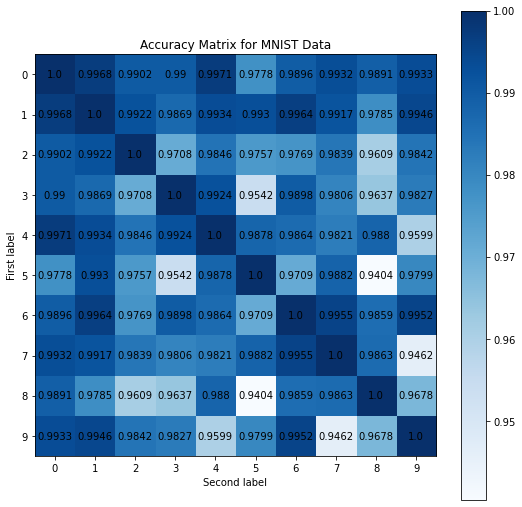

In [6]:
# This few lines visualize the above 2D array. And as the color bar shows, darker color means higher accuracy.
plt.figure(figsize=(9,9))
plt.imshow(result_accuracy, cmap=plt.cm.Blues)
plt.title("Accuracy Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('First label')
plt.xlabel('Second label')
plt.colorbar()
width,height = result_accuracy.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(result_accuracy[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

This accuracy matrix can be interpreted as follows: for each (i, j), entry (i, j) represents the accuracy on the test dataset using the binary logistic regression to classify between i and j.

### Comparison with library logistic regression

In [40]:
X_0_1, y_0_1 = bl.extract_two_numbers(0, 1)
X_0_1_train, X_0_1_test, y_0_1_train, y_0_1_test = train_test_split(X_0_1, y_0_1, test_size = 0.3)
X_0_1_train_after = X_0_1_train.values
y_train_after = y_0_1_train.values
H_train = X_0_1_train_after.T
print(X_0_1_train_after.shape, y_train_after.shape)
logistic = LogisticRegression(solver="liblinear")
logistic.fit(X_0_1_train_after, y_train_after)
L = logistic.predict(X_0_1_test.values)

print(X_0_1_train_after)

(10346, 784) (10346, 1)


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
def accuracy(predict, actual):
    count = 0
    for i in range(len(predict)):
        if predict[i] == actual[i][0]:
            count += 1
    return count / len(predict)

print(y_0_1_test.values)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [32]:
print(accuracy(L, y_0_1_test.values))

0.9984212900315742


In [41]:
def compute_all_library_efficiency():
    result = result = np.reshape(np.arange(100, dtype=float), (10, 10))
    for i in range(10):
        for j in range(i, 10):
            if i == j:
                result[i][j] = 1
            else:
                X_i_j, y_i_j = bl.extract_two_numbers(i, j)
                X_i_j_train, X_i_j_test, y_i_j_train, y_i_j_test = train_test_split(X_i_j, y_i_j, test_size = 0.3)
                X_i_j_train_after = X_i_j_train.values
                y_train_after = np.ravel(y_i_j_train.values)
                logistic = LogisticRegression(solver="liblinear")
                logistic.fit(X_i_j_train_after, y_train_after)
                L = logistic.predict(X_i_j_test.values)
                result[i,j] = accuracy(L, y_i_j_test.values)
                
    for i in range(10):
        for j in range(10):
            if j >= i:
                continue
            else:
                result[i, j] = result[j, i]
    
    return np.round(result, 4)

In [42]:
matrix = compute_all_library_efficiency()
print(matrix)

[[1.     0.9991 0.9914 0.9945 0.9971 0.9881 0.9903 0.9977 0.993  0.995 ]
 [0.9991 1.     0.9906 0.9936 0.998  0.9951 0.9982 0.9956 0.9848 0.9951]
 [0.9914 0.9906 1.     0.9719 0.9872 0.9774 0.9861 0.9862 0.9732 0.99  ]
 [0.9945 0.9936 0.9719 1.     0.9936 0.9581 0.995  0.9861 0.9656 0.9853]
 [0.9971 0.998  0.9872 0.9936 1.     0.9914 0.991  0.9858 0.9919 0.9683]
 [0.9881 0.9951 0.9774 0.9581 0.9914 1.     0.977  0.9936 0.9622 0.9847]
 [0.9903 0.9982 0.9861 0.995  0.991  0.977  1.     0.9988 0.9895 0.9981]
 [0.9977 0.9956 0.9862 0.9861 0.9858 0.9936 0.9988 1.     0.9915 0.9638]
 [0.993  0.9848 0.9732 0.9656 0.9919 0.9622 0.9895 0.9915 1.     0.9804]
 [0.995  0.9951 0.99   0.9853 0.9683 0.9847 0.9981 0.9638 0.9804 1.    ]]


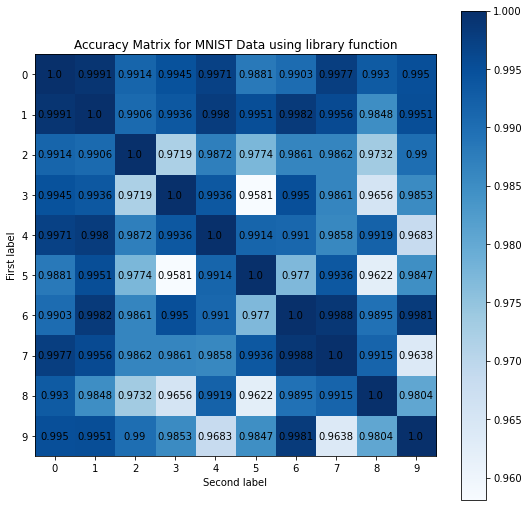

In [45]:
plt.figure(figsize=(9,9))
plt.imshow(matrix, cmap=plt.cm.Blues)
plt.title("Accuracy Matrix for MNIST Data using library function")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('First label')
plt.xlabel('Second label')
plt.colorbar()
width,height = matrix.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(matrix[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

**Interpretation of the results**
1. Overall I think the handwritten model did fairly well in predicting data, the accuracy achived by the library function is only slightly better.
2. It's interesting to see that both the handwritten models and the provided models are weak in classifying between certain numbers like 3 and 5. 
3. However, a major drawback for the handwritten naive version is that the time performace is much weaker than the library function, and I belive that makes sense.